📌 Extracão

In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)

# Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
# normalizando os dados do dataframe 'df'
dados_normalizados = pd.json_normalize(df.to_dict('records'))

# Visualizar as primeiras linhas do dataframe normalizado
display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [13]:
# Visualizar as primeiras linhas
display(df.head(5))

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [14]:
# Variáveis categóricas
df.describe(include=["object", "category"])

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [15]:
#Valores nulos
df.isnull().sum().sort_values(ascending=False)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [16]:
#Distribuição por categorias
print(" Distribuição de valores por variável categórica:")
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).head())

 Distribuição de valores por variável categórica:

--- customerID ---
customerID
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
9970-QBCDA    0.000138
9968-FFVVH    0.000138
Name: proportion, dtype: float64

--- Churn ---
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64

--- customer ---
customer
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}         0.030687
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}       0.026421
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}      0.010596
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}    0.010458
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}       0.010183
Name: proportion, dtype: float64

--- phone ---
phone
{'PhoneService': 'Yes', 'MultipleLines': 'No'}            

In [17]:
#Valores ausentes
# Contar valores ausentes por coluna
df.isnull().sum().sort_values(ascending=False)

# Ver porcentagem de valores ausentes
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


,0
customerID,0.0
Churn,0.0
customer,0.0
phone,0.0
internet,0.0
account,0.0


In [18]:
# Conferir tipos de dados
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [19]:
# Ver valores únicos em cada coluna categórica
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- customerID ---
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

--- Churn ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

--- customer ---
customer
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}         223
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}       192
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}       77
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}     76
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}        74
                                                                                                ... 
{'gender': 'Female', 'SeniorCitizen':

In [22]:
# Quantidade de linhas duplicadas
num_duplicates = dados_normalizados.duplicated().sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows.")
    # Remove duplicate rows
    dados_normalizados.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows.")
else:
    print("There are no duplicate rows.")

There are no duplicate rows.


In [23]:
# Criando a coluna 'Contas_Diarias' no dataframe normalizado
dados_normalizados['Contas_Diarias'] = dados_normalizados['account.Charges.Monthly'] / 30

# Exibindo as primeiras linhas do dataframe normalizado com a nova coluna
display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [24]:
# Definir um dicionário para conversão
map_sim_nao = {
    "Yes": 1,
    "No": 0,
    "Sim": 1,
    "Não": 0,
    "Nao": 0  # caso apareça sem acento
}

colunas_binarias = [
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling',

]

for col in colunas_binarias:
    if col in dados_normalizados.columns:
        dados_normalizados[col] = dados_normalizados[col].map(map_sim_nao).fillna(dados_normalizados[col])

display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


In [25]:
renomear_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Tempo_Contrato',
    'phone.PhoneService': 'Telefone_Servico',
    'phone.MultipleLines': 'Telefone_Linhas_Multiplas',
    'internet.InternetService': 'Internet_Servico',
    'internet.OnlineSecurity': 'Internet_Seguranca_Online',
    'internet.OnlineBackup': 'Internet_Backup_Online',
    'internet.DeviceProtection': 'Internet_Protecao_Dispositivo',
    'internet.TechSupport': 'Internet_Suporte_Tecnico',
    'internet.StreamingTV': 'Internet_Streaming_TV',
    'internet.StreamingMovies': 'Internet_Streaming_Filmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura_Sem_Papel',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Faturamento_Mensal',
    'account.Charges.Total': 'Faturamento_Total'
}

dados_normalizados.rename(columns=renomear_colunas, inplace=True)

display(dados_normalizados.head())

,ID_Cliente,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Telefone_Servico,Telefone_Linhas_Multiplas,Internet_Servico,...,Internet_Protecao_Dispositivo,Internet_Suporte_Tecnico,Internet_Streaming_TV,Internet_Streaming_Filmes,Contrato,Fatura_Sem_Papel,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#📊 Carga e análise

In [29]:
# Converte 'Faturamento_Total' para numérico, forçando erros para NaN
dados_normalizados['Faturamento_Total'] = pd.to_numeric(dados_normalizados['Faturamento_Total'], errors='coerce')

dados_normalizados['Faturamento_Total'] = dados_normalizados['Faturamento_Total'].fillna(0)

desc = dados_normalizados.describe()
print(desc)

colunas_numericas = ['Faturamento_Mensal', 'Faturamento_Total', 'Tempo_Contrato', 'Contas_Diarias']

for col in colunas_numericas:
    print(f'\nAnálise da coluna: {col}')
    print(f'Média: {dados_normalizados[col].mean()}')
    print(f'Mediana: {dados_normalizados[col].median()}')
    print(f'Desvio Padrão: {dados_normalizados[col].std()}')
    print(f'Min: {dados_normalizados[col].min()}')
    print(f'Max: {dados_normalizados[col].max()}')
    print(f'Q1 (25%): {dados_normalizados[col].quantile(0.25)}')
    print(f'Q3 (75%): {dados_normalizados[col].quantile(0.75)}')

             Idoso     Parceiro  Dependentes  Tempo_Contrato  \
count  7267.000000  7267.000000  7267.000000     7267.000000   
mean      0.162653     0.484106     0.300124       32.346498   
std       0.369074     0.499782     0.458343       24.571773   
min       0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000        9.000000   
50%       0.000000     0.000000     0.000000       29.000000   
75%       0.000000     1.000000     1.000000       55.000000   
max       1.000000     1.000000     1.000000       72.000000   

       Telefone_Servico  Fatura_Sem_Papel  Faturamento_Mensal  \
count       7267.000000       7267.000000         7267.000000   
mean           0.902711          0.593230           64.720098   
std            0.296371          0.491265           30.129572   
min            0.000000          0.000000           18.250000   
25%            1.000000          0.000000           35.425000   
50%            1.000000          

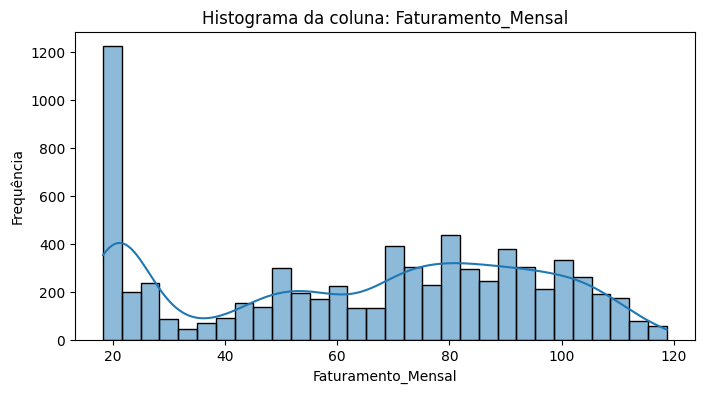

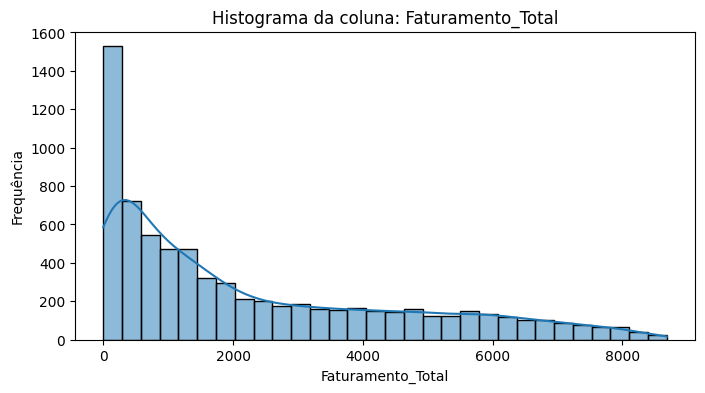

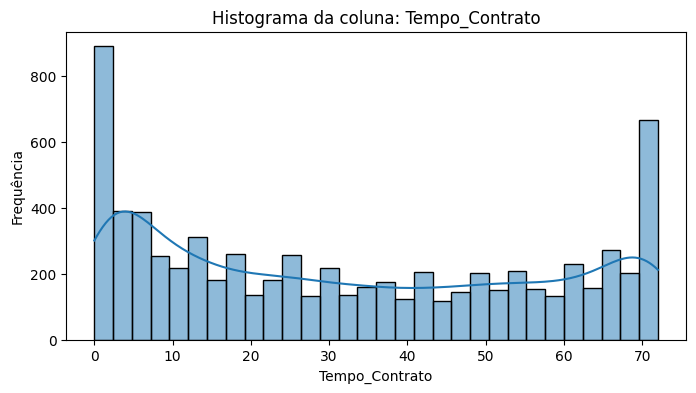

In [28]:
#Histogramas — mostram a distribuição dos dados
import matplotlib.pyplot as plt
import seaborn as sns

colunas_numericas = ['Faturamento_Mensal', 'Faturamento_Total', 'Tempo_Contrato']

for col in colunas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(dados_normalizados[col], bins=30, kde=True)
    plt.title(f'Histograma da coluna: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ocultar avisos
warnings.filterwarnings('ignore')

# Contagem e proporção
print(" Contagem absoluta:")
print(df['Churn'].value_counts())

print("\n Proporção percentual:")
print(df['Churn'].value_counts(normalize=True) * 100)


 Contagem absoluta:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

 Proporção percentual:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


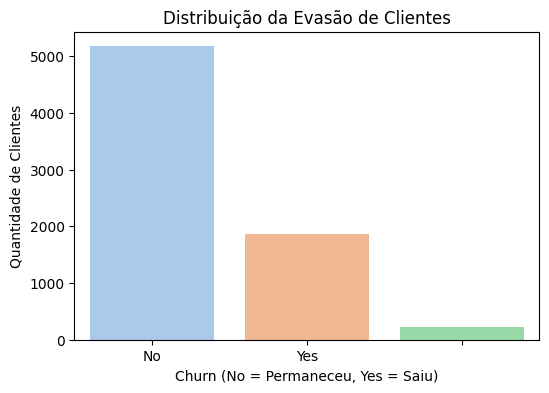

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', hue='Churn', data=df, palette='pastel', legend=False)
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Churn (No = Permaneceu, Yes = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

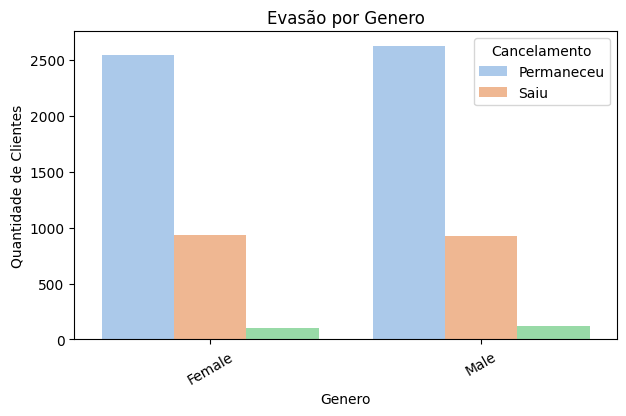

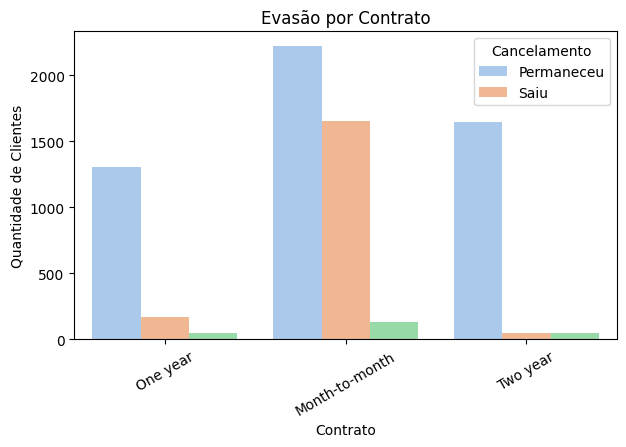

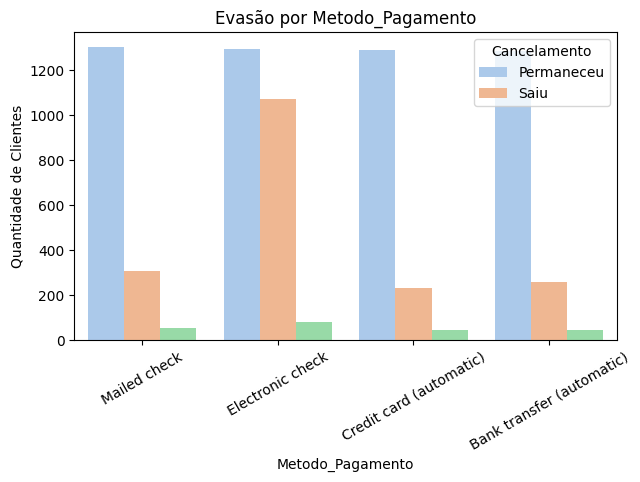

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Lista de variáveis categóricas para análise
variaveis_categoricas = [
    'Genero',
    'Contrato',
    'Metodo_Pagamento'
]

for var in variaveis_categoricas:
    if var in dados_normalizados.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(x=var, hue='Cancelamento', data=dados_normalizados, palette='pastel')
        plt.title(f'Evasão por {var}')  # Título do gráfico em português
        plt.xlabel(var)  # Rótulo do eixo x (já é o nome da variável em português)
        plt.ylabel('Quantidade de Clientes')  # Rótulo do eixo y em português
        plt.xticks(rotation=30)
        plt.legend(title='Cancelamento', labels=['Permaneceu', 'Saiu']) # Título da legenda e rótulos em português
        plt.show()

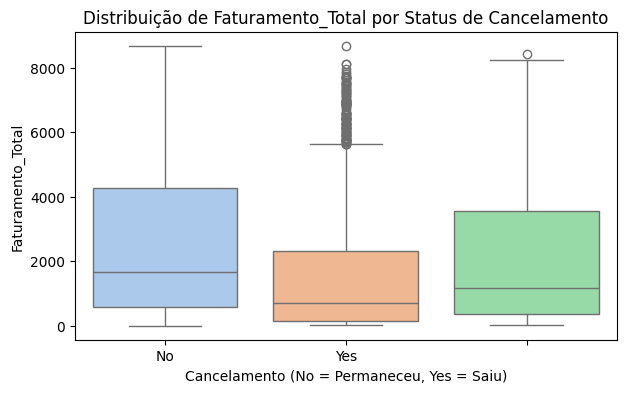

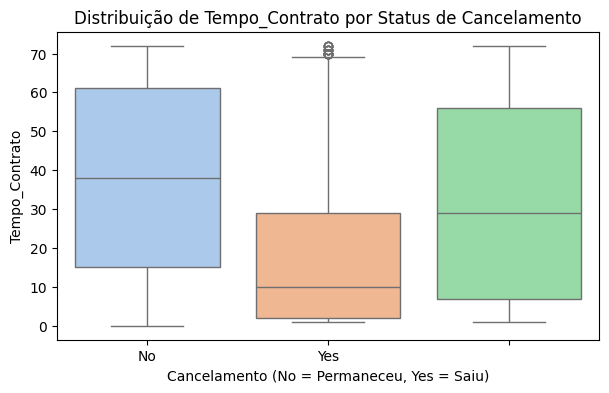

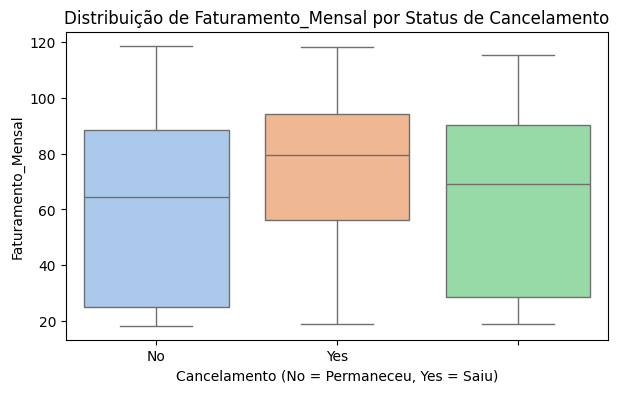

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Lista de variáveis numéricas para análise
variaveis_numericas = [
    'Faturamento_Total',
    'Tempo_Contrato',
    'Faturamento_Mensal'
]

for var in variaveis_numericas:
    if var in dados_normalizados.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(x='Cancelamento', y=var, data=dados_normalizados, palette='pastel')
        plt.title(f'Distribuição de {var} por Status de Cancelamento')
        plt.xlabel('Cancelamento (No = Permaneceu, Yes = Saiu)')
        plt.ylabel(var)
        plt.show()

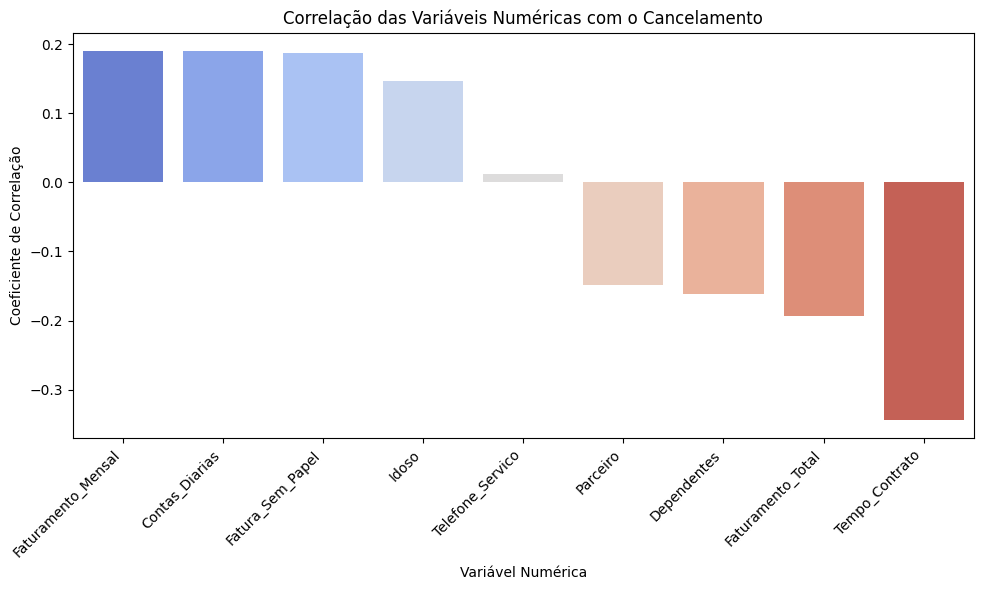

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garanta que 'Cancelamento' seja numérico (mapeie 'Sim' para 1, e 'Não' para 0)
dados_normalizados['Cancelamento_num'] = dados_normalizados['Cancelamento'].map({'Yes': 1, 'No': 0, '': 0})
dados_numericos = dados_normalizados.select_dtypes(include=['float64', 'int64'])
churn_correlations = dados_numericos.corr()['Cancelamento_num'].sort_values(ascending=False)

churn_correlations = churn_correlations.drop('Cancelamento_num')

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_correlations.index, y=churn_correlations.values, palette='coolwarm')
plt.title('Correlação das Variáveis Numéricas com o Cancelamento')
plt.xlabel('Variável Numérica')
plt.ylabel('Coeficiente de Correlação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relação entre Conta Diária e Churn')

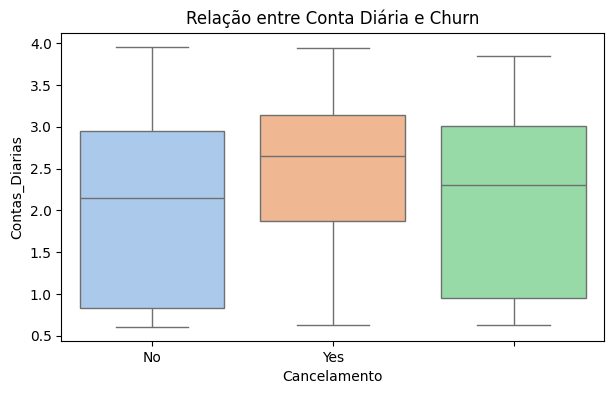

In [52]:
#Relação entre Conta Diária e Churn
plt.figure(figsize=(7,4))
sns.boxplot(x='Cancelamento', y='Contas_Diarias', data=dados_normalizados, palette='pastel')
plt.title('Relação entre Conta Diária e Churn')

#📄Relatorio Final

# Introdução

O objetivo desta análise é entender a evasão de clientes (Churn) na TelecomX, um desafio que afeta a receita e o crescimento da empresa. Buscamos identificar padrões e fatores que levam os clientes a cancelarem seus serviços, fornecendo insights para ajudar a criar estratégias eficazes de retenção e reduzir o churn.

#Limpeza e Tratamento de Dados

- Carregamento e Normalização:
Dados importados de arquivo JSON com campos aninhados e normalizados para formato tabular usando pd.json_normalize().

- Verificação de Dados Faltantes:
Análise mostrou ausência significativa de valores ausentes, facilitando o tratamento dos dados.

- Checagem de Duplicatas:
Nenhum registro duplicado foi encontrado, garantindo que cada linha representa um cliente único.

- Criação da Coluna Contas_Diarias:
Calculada dividindo o faturamento mensal por 30, para representar o custo diário do serviço.

- Conversão de Valores Binários:
Colunas com valores "Yes"/"No" foram convertidas para 1/0 para facilitar análises numéricas.

- Renomeação das Colunas:
Nomes das colunas foram traduzidos e adaptados para português, tornando os dados mais claros e acessíveis.

Objetivo:
Garantir dados limpos, consistentes e estruturados para análises exploratórias posteriores.

# Análise Exploratória de Dados

- **Objetivo:**  
  Identificar padrões e características dos clientes que influenciam a evasão (Churn), utilizando visualizações para entender distribuições e relações.

### Distribuição Geral do Churn

- Cerca de 71,2% dos clientes permaneceram.  
- Aproximadamente 25,7% cancelaram o serviço.  
- 3,1% possuem valores vazios em `Churn`, tratados como não-churn para análise.

### Relação do Churn com Variáveis Categóricas

- **Gênero:**  
  Sem diferença significativa na taxa de evasão entre masculino e feminino.

- **Contrato:**  
  Clientes com contrato mensal (`Month-to-month`) apresentam evasão maior que contratos de 1 ou 2 anos.

- **Método de Pagamento:**  
  `Electronic check` está associado a taxa de churn mais alta comparado a outros métodos.

### Relação do Churn com Variáveis Numéricas

- **Faturamento Mensal:**  
  Clientes que evadiram têm faturamento mensal mediano maior.

- **Faturamento Total:**  
  Clientes que evadiram têm faturamento total mediano menor, devido ao menor tempo de contrato.

- **Tempo de Contrato:**  
  Clientes que cancelam geralmente têm tempo de contrato significativamente menor.

- **Contas Diárias:**  
  Clientes que evadiram apresentam mediana de contas diárias ligeiramente maior.


# Conclusões e Insights

A análise exploratória dos dados identificou padrões importantes relacionados à evasão de clientes (Churn).  

### Principais Conclusões

- Tempo de Contrato é Crucial:

  Clientes com contratos de curto prazo (mês a mês) são muito mais propensos a cancelar do que clientes com contratos de 1 ou 2 anos. A lealdade aumenta com a duração do contrato.

- Método de Pagamento Influencia:

  O pagamento via cheque eletrônico (`Electronic check`) está fortemente associado a uma maior taxa de churn, podendo indicar insatisfação ou menor engajamento.

- Faturamento e Tempo de Contrato:

  Clientes que cancelam têm faturamento mensal mais alto, mas faturamento total menor, refletindo menor tempo de contrato. Contas diárias também reforçam esse padrão.

- Gênero e Serviços Adicionais:

  Variáveis como gênero e a maioria dos serviços adicionais não mostram correlação forte com churn, indicando que não são principais fatores de cancelamento.

- Idosos, Parceiros e Dependentes:

  Clientes idosos têm leve tendência a cancelar, enquanto ter parceiro ou dependentes está associado a menor probabilidade de churn.

---

### Como esses insights ajudam a mitigar a evasão

- Identificação de Clientes em Risco:

  Permite focar em clientes com contratos mês a mês, pagamento por cheque eletrônico, menor tempo de contrato e faturamento total baixo.

- Estratégias de Retenção Direcionadas:

  - Incentivar migração para contratos de longo prazo.  
  - Melhorar ou oferecer alternativas ao método de pagamento por cheque eletrônico.  
  - Criar programas de fidelidade para clientes com menor tempo de contrato.

- Melhoria da Experiência do Cliente:

  Reduzir pontos de atrito para diminuir frustração e churn.

---

Em resumo, tempo de contrato e método de pagamento são fatores-chave para evasão. Focar nesses aspectos e clientes de maior risco ajuda a reduzir churn e aumentar a retenção.


## Recomendações para Reduzir a Evasão de Clientes

1. Personalização Profunda:

   Utilizar dados comportamentais e históricos para criar ofertas e planos personalizados que atendam ao perfil específico de cada cliente, aumentando o engajamento e a percepção de valor.

2. Comunicação Multicanal e Proativa:

   Enviar alertas, mensagens e ofertas por diversos canais (e-mail, SMS, App) antes que o cliente decida cancelar. Investir em atendimento omnichannel para facilitar o contato.

3. Melhoria Contínua da Experiência do Cliente:

   Integrar feedbacks dos clientes no processo de melhoria dos serviços.

4. Incentivos Além do Preço:

   Oferecer vantagens exclusivas, acesso antecipado a novidades, eventos e benefícios extras para fidelizar clientes.

5. **Foco em Clientes Estratégicos:**  
   Identificar clientes de alto valor e criar programas VIP específicos para fortalecer o relacionamento.
